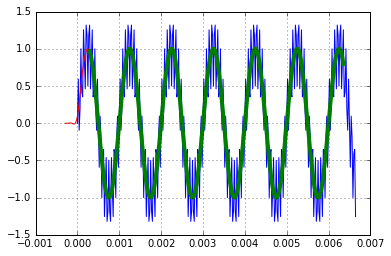

float32_t fir_coeff[29]        = {-0.0018225230, -0.0015879294, +0.0000000000, +0.0036977508, +0.0080754303, +0.0085302217, -0.0000000000, -0.0173976984, -0.0341458607, -0.0333591565, +0.0000000000, +0.0676308395, +0.1522061835, +0.2229246956, +0.2504960933, +0.2229246956, +0.1522061835, +0.0676308395, +0.0000000000, -0.0333591565, -0.0341458607, -0.0173976984, -0.0000000000, +0.0085302217, +0.0080754303, +0.0036977508, +0.0000000000, -0.0015879294, -0.0018225230}


In [2]:
%matplotlib inline
from numpy import sin, arange, pi
from scipy.signal import lfilter, firwin
from pylab import figure, plot, grid, show
 
#------------------------------------------------
# Create a signal for demonstration.
#------------------------------------------------
# 320 samples of (1000Hz + 15000 Hz) at 48 kHz
sample_rate = 48000.
nsamples = 320
 
F_1KHz = 1000.
A_1KHz = 1.0
 
F_15KHz = 15000.
A_15KHz = 0.5
 
t = arange(nsamples) / sample_rate
signal = A_1KHz * sin(2*pi*F_1KHz*t) + A_15KHz*sin(2*pi*F_15KHz*t)
 
#------------------------------------------------
# Create a FIR filter and apply it to signal.
#------------------------------------------------
# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.
 
# The cutoff frequency of the filter: 6KHz
cutoff_hz = 6000.0
 
# Length of the filter (number of coefficients, i.e. the filter order + 1)
numtaps = 29
 
# Use firwin to create a lowpass FIR filter
fir_coeff = firwin(numtaps, cutoff_hz/nyq_rate)
 
# Use lfilter to filter the signal with the FIR filter
filtered_signal = lfilter(fir_coeff, 1.0, signal)
 
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------
 
# The first N-1 samples are "corrupted" by the initial conditions
warmup = numtaps - 1
 
# The phase delay of the filtered signal
delay = (warmup / 2) / sample_rate
 
figure(1)
# Plot the original signal
plot(t, signal)
 
# Plot the filtered signal, shifted to compensate for the phase delay
plot(t-delay, filtered_signal, 'r-')
 
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[warmup:]-delay, filtered_signal[warmup:], 'g', linewidth=4)
 
grid(True)
 
show()
 
#------------------------------------------------
# Print values
#------------------------------------------------
def print_values(label, values):
    var = "float32_t %s[%d]" % (label, len(values))
    print "%-30s = {%s}" % (var, ', '.join(["%+.10f" % x for x in values]))
 
#print_values('signal', signal)
print_values('fir_coeff', fir_coeff)
#print_values('filtered_signal', filtered_signal)